In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from yellowbrick.model_selection import FeatureImportances

from sklearn.model_selection import GridSearchCV

In [ ]:
import pandas as pd

df = pd.read_csv(
    "../data/raw/IGAC_2015_-_2023.csv",
    on_bad_lines="skip",   # saltar filas corruptas
    quoting=3,             # ignorar comillas
    engine="python"        # motor tolerante
)

df.head()

In [21]:
# contar líneas físicas (incluye cabecera)
with open("Registro_de_transacciones_inmobiliarias_en_Colombia_IGAC_2015_-_2023_20251119.csv", "rb") as f:
    lineas_totales = sum(1 for _ in f)

print(f"Líneas físicas en el archivo: {lineas_totales:,}")
print(f"Líneas convertidas en filas del DataFrame: {len(df):,}")
print(f"Líneas descartadas: {lineas_totales - len(df) - 1:,}")  # -1 por la cabecera

Líneas físicas en el archivo: 2,016,633
Líneas convertidas en filas del DataFrame: 1,669,040
Líneas descartadas: 347,592


In [ ]:
df.columns.tolist()

['PK',
 'MATRICULA',
 'FECHA_RADICA_TEXTO',
 'FECHA_APERTURA_TEXTO',
 'YEAR_RADICA',
 'ORIP',
 'DIVIPOLA',
 'DEPARTAMENTO',
 'MUNICIPIO',
 'TIPO_PREDIO_ZONA',
 'CATEGORIA_RURALIDAD',
 'NUM_ANOTACION',
 'ESTADO_FOLIO',
 'FOLIOS_DERIVADOS',
 'Dinámica_Inmobiliaria',
 'COD_NATUJUR',
 'NOMBRE_NATUJUR',
 'NUMERO_CATASTRAL',
 'NUMERO_CATASTRAL_ANTIGUO',
 'DOCUMENTO_JUSTIFICATIVO',
 'COUNT_A',
 'COUNT_DE',
 'PREDIOS_NUEVOS',
 'TIENE_VALOR',
 'TIENE_MAS_DE_UN_VALOR',
 'VALOR']

## Eliminamos las comillas dobles en los campos

In [19]:
df.columns = df.columns.str.replace('"', '', regex=False)
df = df.replace('"', '', regex=True)

In [22]:
df.head()

,PK,MATRICULA,FECHA_RADICA_TEXTO,FECHA_APERTURA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,...,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,VALOR
0,05001-001-000013-00014-00313-2018,001-13,2018-02-05 00:00:00,1973-01-11 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN DE FIDEICOMISO CIVIL,NaN,NaN,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2,1,0,0,0,NaN
1,05001-001-000014-00015-00313-2018,001-14,2018-02-05 00:00:00,1973-01-11 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN DE FIDEICOMISO CIVIL,NaN,NaN,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2,1,0,0,0,NaN
2,05001-001-000023-00007-00109-2020,001-23,2020-12-02 00:00:00,1973-01-10 00:00:00,2020,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,ADJUDICACIÓN EN SUCESION,NaN,NaN,01-ESCRITURA 3322 DE 30-10-2020; NOTARIA OCTAV...,5,1,0,0,0,NaN
3,05001-001-000065-00013-00317-2015,001-65,2015-12-16 00:00:00,1973-01-10 00:00:00,2015,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN REGLAMENTO DE PROPIEDAD HORIZONTAL,NaN,NaN,01-ESCRITURA 8145 DE 04-12-2015; NOTARIA DIECI...,0,1,0,0,0,NaN
4,05001-001-000067-00014-00109-2016,001-67,2016-03-29 00:00:00,1973-01-11 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,ADJUDICACIÓN EN SUCESION,NaN,NaN,01-ESCRITURA 1266 DE 10-03-2016; NOTARIA DIECI...,1,1,0,0,0,NaN


In [23]:
df.dtypes

,0
PK,object
MATRICULA,object
FECHA_RADICA_TEXTO,object
FECHA_APERTURA_TEXTO,object
YEAR_RADICA,object
ORIP,object
DIVIPOLA,object
DEPARTAMENTO,object
MUNICIPIO,object
TIPO_PREDIO_ZONA,object


In [24]:
df["MUNICIPIO"].unique()

array(['MEDELLÍN', 'AMAGÁ', 'ANDES', 'ANORÍ', 'ARBOLETES', 'ARGELIA',
       'CAREPA', 'CHIGORODÓ', 'DABEIBA', 'FREDONIA', 'GUATAPÉ', 'ITUANGO',
       'JARDÍN', 'LA CEJA', 'LA UNIÓN', 'NARIÑO', 'SALGAR', 'SAN PABLO',
       'TUNJA', 'GARAGOA', 'ÚMBITA', 'CHINCHINÁ', 'PALESTINA',
       'PUERTO RICO', 'CAJIBÍO', 'CALDONO', 'CORINTO', 'SUÁREZ', 'TOTORÓ',
       'CURUMANÍ', 'EL COPEY', 'PAILITAS', 'RÍO DE ORO', 'LA PAZ',
       'SAN MARTÍN', 'AYAPEL', 'BUENAVISTA', 'CERETÉ', 'CHIMÁ', 'SAHAGÚN',
       'APULO', 'BAHÍA SOLANO', 'ISTMINA', 'LLORÓ', 'NUQUÍ', 'ALGECIRAS',
       'CAMPOALEGRE', 'LA PLATA', 'PAICOL', 'PALERMO', 'PITAL', 'RIVERA',
       'VILLAVIEJA', 'SANTA ANA', 'ACACÍAS', 'CUMARAL', 'EL CASTILLO',
       'EL DORADO', 'GUAMAL', 'LEJANÍAS', 'FUNES', 'SAMANIEGO', 'SANDONÁ',
       'TAMINANGO', 'BARBOSA', 'CIMITARRA', 'CURITÍ', 'MORROA', 'ESPINAL',
       'FALAN', 'GUAMO', 'LÉRIDA', 'LÍBANO', 'TAME', 'PAZ DE ARIPORO',
       'VILLAGARZÓN', 'SONSÓN', 'ZARAGOZA', 'ABRIAQUÍ', 'ALEJA

In [ ]:
df["YEAR_RADICA"].unique()

array(['2018', '2020', '2015', '2016', '2017', '2019', '2022', '2021',
       '2023'], dtype=object)

In [ ]:
df["FECHA_RADICA_TEXTO"].unique()

array(['2018-02-05 00:00:00', '2020-12-02 00:00:00',
       '2015-12-16 00:00:00', ..., '08/02/22', '07/09/21', '16/06/21'],
      dtype=object)

 Convertimos campos a valores string

In [ ]:
df.columns

Index(['PK', 'MATRICULA', 'FECHA_RADICA_TEXTO', 'FECHA_APERTURA_TEXTO',
       'YEAR_RADICA', 'ORIP', 'DIVIPOLA', 'DEPARTAMENTO', 'MUNICIPIO',
       'TIPO_PREDIO_ZONA', 'CATEGORIA_RURALIDAD', 'NUM_ANOTACION',
       'ESTADO_FOLIO', 'FOLIOS_DERIVADOS', 'Dinámica_Inmobiliaria',
       'COD_NATUJUR', 'NOMBRE_NATUJUR', 'NUMERO_CATASTRAL',
       'NUMERO_CATASTRAL_ANTIGUO', 'DOCUMENTO_JUSTIFICATIVO', 'COUNT_A',
       'COUNT_DE', 'PREDIOS_NUEVOS', 'TIENE_VALOR', 'TIENE_MAS_DE_UN_VALOR',
       'VALOR'],
      dtype='object')

Conversión de objeto a tipo string

In [ ]:
cols_texto = [
    "PK", "MATRICULA", "FECHA_RADICA_TEXTO", "FECHA_APERTURA_TEXTO",
    "YEAR_RADICA", "ORIP", "DIVIPOLA", "DEPARTAMENTO", "MUNICIPIO",
    "TIPO_PREDIO_ZONA", "CATEGORIA_RURALIDAD", "ESTADO_FOLIO",
    "FOLIOS_DERIVADOS", "NOMBRE_NATUJUR", "NUMERO_CATASTRAL",
    "NUMERO_CATASTRAL_ANTIGUO", "DOCUMENTO_JUSTIFICATIVO"
]

df[cols_texto] = df[cols_texto].astype("string")

Convertir campos a valores numericos

In [ ]:
cols_num = [
    "NUM_ANOTACION", "Dinámica_Inmobiliaria", "COD_NATUJUR",
    "COUNT_A", "COUNT_DE", "PREDIOS_NUEVOS",
    "TIENE_VALOR", "TIENE_MAS_DE_UN_VALOR", "VALOR"
]

df[cols_num] = df[cols_num].apply(pd.to_numeric, errors="coerce")


In [ ]:
df.dtypes #verificamos el tipo de dato

,0
PK,string[python]
MATRICULA,string[python]
FECHA_RADICA_TEXTO,string[python]
FECHA_APERTURA_TEXTO,string[python]
YEAR_RADICA,string[python]
ORIP,string[python]
DIVIPOLA,string[python]
DEPARTAMENTO,string[python]
MUNICIPIO,string[python]
TIPO_PREDIO_ZONA,string[python]


In [ ]:
df.head()

,PK,MATRICULA,FECHA_RADICA_TEXTO,FECHA_APERTURA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,...,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,VALOR
0,05001-001-000013-00014-00313-2018,001-13,2018-02-05 00:00:00,1973-01-11 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN DE FIDEICOMISO CIVIL,<NA>,<NA>,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2.0,1.0,0.0,0.0,0.0,NaN
1,05001-001-000014-00015-00313-2018,001-14,2018-02-05 00:00:00,1973-01-11 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN DE FIDEICOMISO CIVIL,<NA>,<NA>,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2.0,1.0,0.0,0.0,0.0,NaN
2,05001-001-000023-00007-00109-2020,001-23,2020-12-02 00:00:00,1973-01-10 00:00:00,2020,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,ADJUDICACIÓN EN SUCESION,<NA>,<NA>,01-ESCRITURA 3322 DE 30-10-2020; NOTARIA OCTAV...,5.0,1.0,0.0,0.0,0.0,NaN
3,05001-001-000065-00013-00317-2015,001-65,2015-12-16 00:00:00,1973-01-10 00:00:00,2015,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN REGLAMENTO DE PROPIEDAD HORIZONTAL,<NA>,<NA>,01-ESCRITURA 8145 DE 04-12-2015; NOTARIA DIECI...,0.0,1.0,0.0,0.0,0.0,NaN
4,05001-001-000067-00014-00109-2016,001-67,2016-03-29 00:00:00,1973-01-11 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,ADJUDICACIÓN EN SUCESION,<NA>,<NA>,01-ESCRITURA 1266 DE 10-03-2016; NOTARIA DIECI...,1.0,1.0,0.0,0.0,0.0,NaN


In [16]:
df.size

43395040

In [ ]:
# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Manejo de archivos Pandas
import pandas as pd

# Manejo de matrices
import numpy as np

# División de los datos en entrenamiento y testing
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

# Metricas bonitas
from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error

# Herramientas
## Encoder, paso de variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder
## Para preprocesar las features
from sklearn import preprocessing

#Balance de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

# Visualización y gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA

In [ ]:
df.dtypes

,0
PK,string[python]
MATRICULA,string[python]
FECHA_RADICA_TEXTO,string[python]
FECHA_APERTURA_TEXTO,string[python]
YEAR_RADICA,string[python]
ORIP,string[python]
DIVIPOLA,string[python]
DEPARTAMENTO,string[python]
MUNICIPIO,string[python]
TIPO_PREDIO_ZONA,string[python]


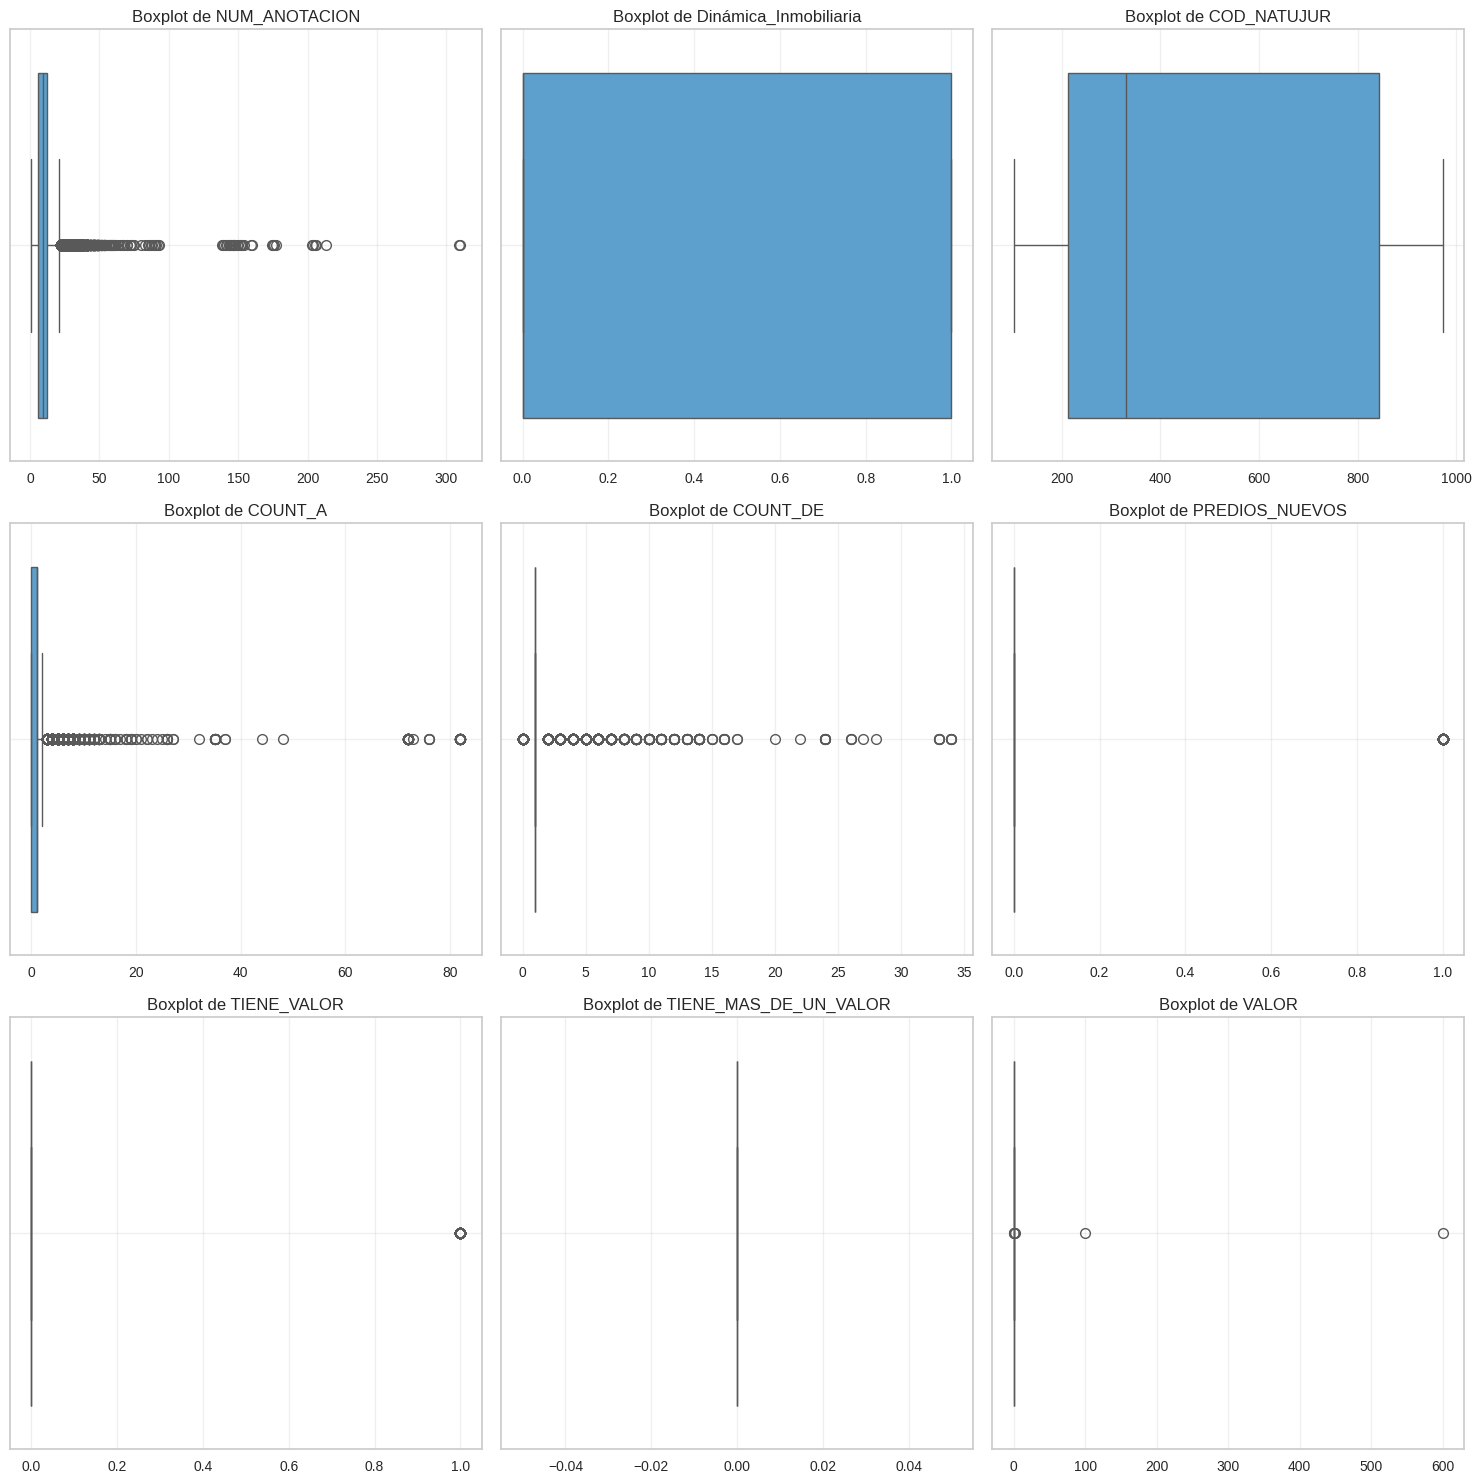

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = [
 "NUM_ANOTACION", "Dinámica_Inmobiliaria", "COD_NATUJUR",
    "COUNT_A", "COUNT_DE", "PREDIOS_NUEVOS",
    "TIENE_VALOR", "TIENE_MAS_DE_UN_VALOR", "VALOR"
]

n = len(columnas_numericas)
columnas = 3
filas = math.ceil(n / columnas)

plt.figure(figsize=(15, 5 * filas))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(filas, columnas, i)
    sns.boxplot(x=df[col], color="#4AA3E0")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
print(df.describe(include = "all"))

                                       PK  MATRICULA   FECHA_RADICA_TEXTO  \
count                              185032     185032               185032   
unique                             185032      79026                 1877   
top     05030-033-017552-00006-00901-2017  027-30420  2016-04-22 00:00:00   
freq                                    1         28                22158   
mean                                  NaN        NaN                  NaN   
std                                   NaN        NaN                  NaN   
min                                   NaN        NaN                  NaN   
25%                                   NaN        NaN                  NaN   
50%                                   NaN        NaN                  NaN   
75%                                   NaN        NaN                  NaN   
max                                   NaN        NaN                  NaN   

       FECHA_APERTURA_TEXTO YEAR_RADICA    ORIP DIVIPOLA DEPARTAMENTO  \
co

## Procesamiento de datos

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

df = pd.DataFrame(df)
df

,PK,MATRICULA,FECHA_RADICA_TEXTO,FECHA_APERTURA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,...,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,VALOR
0,05001-001-000013-00014-00313-2018,001-13,2018-02-05 00:00:00,1973-01-11 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN DE FIDEICOMISO CIVIL,<NA>,<NA>,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2.0,1.0,0.0,0.0,0.0,NaN
1,05001-001-000014-00015-00313-2018,001-14,2018-02-05 00:00:00,1973-01-11 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN DE FIDEICOMISO CIVIL,<NA>,<NA>,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2.0,1.0,0.0,0.0,0.0,NaN
2,05001-001-000023-00007-00109-2020,001-23,2020-12-02 00:00:00,1973-01-10 00:00:00,2020,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,ADJUDICACIÓN EN SUCESION,<NA>,<NA>,01-ESCRITURA 3322 DE 30-10-2020; NOTARIA OCTAV...,5.0,1.0,0.0,0.0,0.0,NaN
3,05001-001-000065-00013-00317-2015,001-65,2015-12-16 00:00:00,1973-01-10 00:00:00,2015,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CONSTITUCIÓN REGLAMENTO DE PROPIEDAD HORIZONTAL,<NA>,<NA>,01-ESCRITURA 8145 DE 04-12-2015; NOTARIA DIECI...,0.0,1.0,0.0,0.0,0.0,NaN
4,05001-001-000067-00014-00109-2016,001-67,2016-03-29 00:00:00,1973-01-11 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,ADJUDICACIÓN EN SUCESION,<NA>,<NA>,01-ESCRITURA 1266 DE 10-03-2016; NOTARIA DIECI...,1.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185027,05001-001-1193022-00005-00842-2022,001-1193022,2022-11-11 00:00:00,2014-12-12 00:00:00,2022,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CANCELACIÓN PROVIDENCIA ADMINISTRATIVA,<NA>,<NA>,04-OFICIO 34073 DE 28-10-2022; FONVALMED DE ME...,0.0,1.0,0.0,0.0,0.0,NaN
185028,05001-001-1193023-00004-00842-2022,001-1193023,2022-11-11 00:00:00,2014-12-12 00:00:00,2022,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,CANCELACIÓN PROVIDENCIA ADMINISTRATIVA,<NA>,<NA>,04-OFICIO 34073 DE 28-10-2022; FONVALMED DE ME...,0.0,1.0,0.0,0.0,0.0,NaN
185029,05001-001-1193024-00002-00164-2016,001-1193024,2016-01-27 00:00:00,2014-12-12 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,TRANSFERENCIA DE DOMINIO A TÍTULO DE BENEFICIO...,<NA>,<NA>,01-ESCRITURA 6013 DE 18-11-2015; NOTARIA VEINT...,2.0,1.0,0.0,0.0,0.0,NaN
185030,05001-001-1193025-00002-00164-2016,001-1193025,2016-01-27 00:00:00,2014-12-12 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,...,TRANSFERENCIA DE DOMINIO A TÍTULO DE BENEFICIO...,<NA>,<NA>,01-ESCRITURA 6013 DE 18-11-2015; NOTARIA VEINT...,2.0,1.0,0.0,0.0,0.0,NaN


### Identificacion de valores nulos faltantes

In [ ]:
# Identificación de valores faltantes
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
PK                          0
MATRICULA                   0
FECHA_RADICA_TEXTO          0
YEAR_RADICA                 0
ORIP                        0
DIVIPOLA                    0
DEPARTAMENTO                0
MUNICIPIO                   0
TIPO_PREDIO_ZONA            0
CATEGORIA_RURALIDAD         0
NUM_ANOTACION               0
ESTADO_FOLIO                0
FOLIOS_DERIVADOS            0
Dinámica_Inmobiliaria       0
COD_NATUJUR                 0
NOMBRE_NATUJUR              0
NUMERO_CATASTRAL            0
NUMERO_CATASTRAL_ANTIGUO    0
DOCUMENTO_JUSTIFICATIVO     0
COUNT_A                     1
COUNT_DE                    1
PREDIOS_NUEVOS              1
TIENE_VALOR                 1
TIENE_MAS_DE_UN_VALOR       1
dtype: int64


In [ ]:
df.shape

(185032, 26)

In [ ]:
df["FOLIOS_DERIVADOS"].notnull().sum()

np.int64(220)

In [ ]:
df["VALOR"].unique()

array([ nan,   0.,   2., 100., 600.,   1.])

In [ ]:
#ELIMINAR FECHA DE APERTURA Y FOLIOS_DERIVADOS Y LOS ESTADOS LOS QUE ESTAN VACIOS LOS COLOCAMOS EN INACTIVOS, NUMERO CATASTRAL ANTIGUO Y NUMERO CATASTRO QUE ESTEN EN VACIOS LOS COLOCAMOS EN CERO, VALOR LO ELIMINAMOS, valor la eliminar

In [ ]:
#ELIMINACION DE LOS CAMPOS FECHA_APERTURA Y VALOR
df = df.drop(columns=["FECHA_APERTURA_TEXTO", "VALOR"])

In [ ]:
df.head()

,PK,MATRICULA,FECHA_RADICA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,CATEGORIA_RURALIDAD,...,COD_NATUJUR,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR
0,05001-001-000013-00014-00313-2018,001-13,2018-02-05 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,313,CONSTITUCIÓN DE FIDEICOMISO CIVIL,<NA>,<NA>,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2.0,1.0,0.0,0.0,0.0
1,05001-001-000014-00015-00313-2018,001-14,2018-02-05 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,313,CONSTITUCIÓN DE FIDEICOMISO CIVIL,<NA>,<NA>,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,2.0,1.0,0.0,0.0,0.0
2,05001-001-000023-00007-00109-2020,001-23,2020-12-02 00:00:00,2020,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,109,ADJUDICACIÓN EN SUCESION,<NA>,<NA>,01-ESCRITURA 3322 DE 30-10-2020; NOTARIA OCTAV...,5.0,1.0,0.0,0.0,0.0
3,05001-001-000065-00013-00317-2015,001-65,2015-12-16 00:00:00,2015,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,317,CONSTITUCIÓN REGLAMENTO DE PROPIEDAD HORIZONTAL,<NA>,<NA>,01-ESCRITURA 8145 DE 04-12-2015; NOTARIA DIECI...,0.0,1.0,0.0,0.0,0.0
4,05001-001-000067-00014-00109-2016,001-67,2016-03-29 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,109,ADJUDICACIÓN EN SUCESION,<NA>,<NA>,01-ESCRITURA 1266 DE 10-03-2016; NOTARIA DIECI...,1.0,1.0,0.0,0.0,0.0


In [ ]:
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
PK                               0
MATRICULA                        0
FECHA_RADICA_TEXTO               0
YEAR_RADICA                      0
ORIP                             0
DIVIPOLA                         0
DEPARTAMENTO                     0
MUNICIPIO                        0
TIPO_PREDIO_ZONA                 0
CATEGORIA_RURALIDAD              0
NUM_ANOTACION                    0
ESTADO_FOLIO                180184
FOLIOS_DERIVADOS            184812
Dinámica_Inmobiliaria            0
COD_NATUJUR                      0
NOMBRE_NATUJUR                   0
NUMERO_CATASTRAL            185032
NUMERO_CATASTRAL_ANTIGUO    185032
DOCUMENTO_JUSTIFICATIVO          0
COUNT_A                          1
COUNT_DE                         1
PREDIOS_NUEVOS                   1
TIENE_VALOR                      1
TIENE_MAS_DE_UN_VALOR            1
dtype: int64


In [ ]:
df.shape

(185032, 24)

In [ ]:
df["ESTADO_FOLIO"].unique()

<StringArray>
[<NA>, 'ACTIVO', 'CERRADO']
Length: 3, dtype: string

In [ ]:
#LOS CAMPOS DE ESTADO_FOLIO Y FOLIOS_DERIVADOS LOS REEMPLAZAMOS LOS VALORES NULOS POR "INACTIVO" Y "SIN_FOLIO" RESPECTIVAMENTE
df["ESTADO_FOLIO"] = df["ESTADO_FOLIO"].fillna("INACTIVO")
df["FOLIOS_DERIVADOS"] = df["FOLIOS_DERIVADOS"].fillna("SIN_FOLIO")


In [ ]:
df["ESTADO_FOLIO"].unique()


<StringArray>
['INACTIVO', 'ACTIVO', 'CERRADO']
Length: 3, dtype: string

In [ ]:
df["FOLIOS_DERIVADOS"].unique()

<StringArray>
[                    'SIN_FOLIO',                     '184-23101',
                    '200-262458',                     '226-52011',
                     '232-56193',                     '027-30537',
                     '027-30538',                     '027-30539',
                     '027-30540',                     '027-30541',
 ...
                     '027-30749',                     '027-30750',
                     '027-30751',                     '027-30752',
                     '027-30753',                     '027-30754',
                     '027-30755',                     '033-17946',
 '033-17948;033-17949;033-17947', '033-18706;033-18707;033-18705']
Length: 203, dtype: string

In [ ]:
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
PK                               0
MATRICULA                        0
FECHA_RADICA_TEXTO               0
YEAR_RADICA                      0
ORIP                             0
DIVIPOLA                         0
DEPARTAMENTO                     0
MUNICIPIO                        0
TIPO_PREDIO_ZONA                 0
CATEGORIA_RURALIDAD              0
NUM_ANOTACION                    0
ESTADO_FOLIO                     0
FOLIOS_DERIVADOS                 0
Dinámica_Inmobiliaria            0
COD_NATUJUR                      0
NOMBRE_NATUJUR                   0
NUMERO_CATASTRAL            185032
NUMERO_CATASTRAL_ANTIGUO    185032
DOCUMENTO_JUSTIFICATIVO          0
COUNT_A                          1
COUNT_DE                         1
PREDIOS_NUEVOS                   1
TIENE_VALOR                      1
TIENE_MAS_DE_UN_VALOR            1
dtype: int64


In [ ]:
# Reemplazar los campos de NUMERO_CATASTRAL y SIN_NUMERO_CATASTRAL por SIN_NUMERO_CATASTRAL y SIN_NUMERO_CATASTRAL_ANTIGUO respectivamente
df["NUMERO_CATASTRAL"] = df["NUMERO_CATASTRAL"].fillna("SIN_NUMERO_CATASTRAL")
df["NUMERO_CATASTRAL_ANTIGUO"] = df["NUMERO_CATASTRAL_ANTIGUO"].fillna("SIN_NUMERO_CATASTRAL_ANTIGUO")

In [ ]:
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
PK                          0
MATRICULA                   0
FECHA_RADICA_TEXTO          0
YEAR_RADICA                 0
ORIP                        0
DIVIPOLA                    0
DEPARTAMENTO                0
MUNICIPIO                   0
TIPO_PREDIO_ZONA            0
CATEGORIA_RURALIDAD         0
NUM_ANOTACION               0
ESTADO_FOLIO                0
FOLIOS_DERIVADOS            0
Dinámica_Inmobiliaria       0
COD_NATUJUR                 0
NOMBRE_NATUJUR              0
NUMERO_CATASTRAL            0
NUMERO_CATASTRAL_ANTIGUO    0
DOCUMENTO_JUSTIFICATIVO     0
COUNT_A                     1
COUNT_DE                    1
PREDIOS_NUEVOS              1
TIENE_VALOR                 1
TIENE_MAS_DE_UN_VALOR       1
dtype: int64


Eliminamos toda los datos nulos

In [ ]:
# Opciones de manejo de valores faltantes
df_con_limpieza = df.dropna()
valores_faltantes = df_con_limpieza.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
PK                          0
MATRICULA                   0
FECHA_RADICA_TEXTO          0
YEAR_RADICA                 0
ORIP                        0
DIVIPOLA                    0
DEPARTAMENTO                0
MUNICIPIO                   0
TIPO_PREDIO_ZONA            0
CATEGORIA_RURALIDAD         0
NUM_ANOTACION               0
ESTADO_FOLIO                0
FOLIOS_DERIVADOS            0
Dinámica_Inmobiliaria       0
COD_NATUJUR                 0
NOMBRE_NATUJUR              0
NUMERO_CATASTRAL            0
NUMERO_CATASTRAL_ANTIGUO    0
DOCUMENTO_JUSTIFICATIVO     0
COUNT_A                     0
COUNT_DE                    0
PREDIOS_NUEVOS              0
TIENE_VALOR                 0
TIENE_MAS_DE_UN_VALOR       0
dtype: int64


In [ ]:
df_con_limpieza.size

4440744

In [ ]:
df.shape

(185032, 24)

## Eliminacion de datos duplicados

In [ ]:
# Identificación de registros duplicados
registros_duplicados = df_con_limpieza.duplicated().sum()
print("Registros duplicados:", registros_duplicados)

# Eliminación de registros duplicados
#df_sin_duplicados = df.drop_duplicates()

Registros duplicados: 0


No hay datos duplicados

## Identificación de valores atípicos


In [ ]:
# Columnas numéricas del dataset de cáncer de mama

columns = [
 "NUM_ANOTACION", "Dinámica_Inmobiliaria", "COD_NATUJUR",
    "COUNT_A", "COUNT_DE", "PREDIOS_NUEVOS",
    "TIENE_VALOR", "TIENE_MAS_DE_UN_VALOR"
]


outliers = {}

for col in columns:
    Q1 = df_con_limpieza[col].quantile(0.25)
    Q3 = df_con_limpieza[col].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    # Filtrar valores atípicos
    valores_atipicos = df_con_limpieza[(df_con_limpieza[col] < umbral_inferior) | (df_con_limpieza[col] > umbral_superior)]
    outliers[col] = valores_atipicos[col].values  # guardar los valores atípicos

    print(f"--- {col} ---")
    print(f"Umbral inferior: {umbral_inferior:.2f}, Umbral superior: {umbral_superior:.2f}")
    print(f"Número de valores atípicos: {len(valores_atipicos)}")
    print(valores_atipicos[[col]].head(), "\n")

--- NUM_ANOTACION ---
Umbral inferior: -3.00, Umbral superior: 21.00
Número de valores atípicos: 5199
      NUM_ANOTACION
3356             26
3357             27
3358             28
3359             29
3360             30 

--- Dinámica_Inmobiliaria ---
Umbral inferior: -1.50, Umbral superior: 2.50
Número de valores atípicos: 0
Empty DataFrame
Columns: [Dinámica_Inmobiliaria]
Index: [] 

--- COD_NATUJUR ---
Umbral inferior: -734.50, Umbral superior: 1789.50
Número de valores atípicos: 0
Empty DataFrame
Columns: [COD_NATUJUR]
Index: [] 

--- COUNT_A ---
Umbral inferior: -1.50, Umbral superior: 2.50
Número de valores atípicos: 4243
    COUNT_A
2       5.0
40      5.0
41      3.0
42      3.0
43      3.0 

--- COUNT_DE ---
Umbral inferior: 1.00, Umbral superior: 1.00
Número de valores atípicos: 28914
   COUNT_DE
5       0.0
6       2.0
7       2.0
8       3.0
9       0.0 

--- PREDIOS_NUEVOS ---
Umbral inferior: 0.00, Umbral superior: 0.00
Número de valores atípicos: 3735
    PREDIOS_NUEVO

In [ ]:
df_con_limpieza["NUM_ANOTACION"].unique()

array([ 14,  15,   7,  13,   3,   4,   5,   6,   1,   8,   2,   9,  11,
        10,  12,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  17,
        18,  19,  20,  23,  22,  25,  21,  16,  24,  49,  50, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 159, 160, 174, 175, 176, 177,  51,  53,  54,  55, 203,
       204, 205, 206,  59,  52,  72,  73,  74,  75,  56,  57,  65,  66,
        67,  68,  70,  60,  61,  62, 213,  58,  63, 309, 310,  80,  83,
        85,  86,  87,  88,  89,  90,  91,  92,  93])

In [ ]:
df_con_limpieza["COUNT_A"].unique()

array([ 2.,  5.,  0.,  1.,  3.,  4.,  6.,  8.,  7., 11., 13., 15., 12.,
       35.,  9., 18., 10., 20., 26., 44., 48., 14., 16., 72., 73., 24.,
       25., 27., 19., 82., 32., 21., 22., 76., 17., 23., 37.])

In [ ]:
df_con_limpieza["COUNT_DE"].unique()

array([ 1.,  0.,  2.,  3.,  8.,  5.,  6.,  4.,  7., 34., 15., 10., 26.,
       13., 14., 11., 24.,  9., 12., 17., 27., 28., 16., 33., 22., 20.])

In [ ]:
df_con_limpieza["PREDIOS_NUEVOS"].unique()

array([0., 1.])

In [ ]:
df_con_limpieza["TIENE_VALOR"].unique()

array([0., 1.])

Los campos de NUM_ANOTACION, COUNT_A, COUNT_DE TIENEN VALORES ATIPICOS LAS DEMAS SON CAMPOS BINARIOS O NO TIENE VALORES ATIPICOS

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# ---------------------------------------------------------
# 1. Copia del dataframe original
# ---------------------------------------------------------
df_clean = df_con_limpieza.copy()

# ---------------------------------------------------------
# 2. Conversión a numérico
# ---------------------------------------------------------
cols_numeric = [
    "NUM_ANOTACION", "Dinámica_Inmobiliaria", "COD_NATUJUR",
    "COUNT_A", "COUNT_DE", "PREDIOS_NUEVOS",
    "TIENE_VALOR", "TIENE_MAS_DE_UN_VALOR"
]

df_clean[cols_numeric] = df_clean[cols_numeric].apply(
    pd.to_numeric, errors="coerce"
)

# ---------------------------------------------------------
# 3. OPCIÓN A: Winsorización (reemplazar valores atípicos con límites)
# ---------------------------------------------------------
def winsorize_column(series, lower_percentile=0.01, upper_percentile=0.99):
    """Limita valores extremos a los percentiles especificados"""
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Aplicar winsorización a las columnas con valores atípicos
df_clean["NUM_ANOTACION"] = winsorize_column(df_clean["NUM_ANOTACION"], 0.01, 0.99)
df_clean["COUNT_A"] = winsorize_column(df_clean["COUNT_A"], 0.01, 0.99)
df_clean["COUNT_DE"] = winsorize_column(df_clean["COUNT_DE"], 0.01, 0.99)

# ---------------------------------------------------------
# 4. OPCIÓN B: Transformación logarítmica (para distribuciones asimétricas)
# ---------------------------------------------------------
# Agregar 1 para evitar log(0)
df_clean["NUM_ANOTACION_log"] = np.log1p(df_clean["NUM_ANOTACION"])
df_clean["COUNT_A_log"] = np.log1p(df_clean["COUNT_A"])
df_clean["COUNT_DE_log"] = np.log1p(df_clean["COUNT_DE"])

# ---------------------------------------------------------
# 5. OPCIÓN C: RobustScaler (resistente a valores atípicos)
# ---------------------------------------------------------
scaler = RobustScaler()
cols_to_scale = ["NUM_ANOTACION", "COUNT_A", "COUNT_DE"]

df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

# ---------------------------------------------------------
# 6. Verificar resultados
# ---------------------------------------------------------
print("✔ Transformación completada.")
print("Tamaño final:", df_clean.shape)

print("\n--- ESTADÍSTICAS DESPUÉS DE WINSORIZACIÓN ---")
for col in ["NUM_ANOTACION", "COUNT_A", "COUNT_DE"]:
    print(f"\n{col}:")
    print(f"  Min: {df_clean[col].min():.2f}")
    print(f"  Max: {df_clean[col].max():.2f}")
    print(f"  Media: {df_clean[col].mean():.2f}")
    print(f"  Mediana: {df_clean[col].median():.2f}")

# ---------------------------------------------------------
# 7. Verificar valores atípicos nuevamente
# ---------------------------------------------------------
print("\n--- CANTIDAD DE VALORES ATIPICOS DESPUÉS DE TRANSFORMACIÓN ---")
for col in ["NUM_ANOTACION", "COUNT_A", "COUNT_DE"]:
    low = df_clean[col].quantile(0.005)
    high = df_clean[col].quantile(0.995)
    valores_atípicos = df_clean[(df_clean[col] < low) | (df_clean[col] > high)]
    print(f"{col}: {len(valores_atípicos)} valores atípicos")

✔ Transformación completada.
Tamaño final: (185031, 27)

--- ESTADÍSTICAS DESPUÉS DE WINSORIZACIÓN ---

NUM_ANOTACION:
  Min: -1.33
  Max: 3.33
  Media: 0.07
  Mediana: 0.00

COUNT_A:
  Min: -1.00
  Max: 3.00
  Media: -0.35
  Mediana: 0.00

COUNT_DE:
  Min: -1.00
  Max: 2.00
  Media: 0.12
  Mediana: 0.00

--- CANTIDAD DE VALORES ATIPICOS DESPUÉS DE TRANSFORMACIÓN ---
NUM_ANOTACION: 0 valores atípicos
COUNT_A: 0 valores atípicos
COUNT_DE: 0 valores atípicos


In [ ]:
df_clean.head()

,PK,MATRICULA,FECHA_RADICA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,CATEGORIA_RURALIDAD,...,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,NUM_ANOTACION_log,COUNT_A_log,COUNT_DE_log
0,05001-001-000013-00014-00313-2018,001-13,2018-02-05 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,SIN_NUMERO_CATASTRAL_ANTIGUO,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,1.0,0.0,0.0,0.0,0.0,2.708050,1.098612,0.693147
1,05001-001-000014-00015-00313-2018,001-14,2018-02-05 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,SIN_NUMERO_CATASTRAL_ANTIGUO,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,1.0,0.0,0.0,0.0,0.0,2.772589,1.098612,0.693147
2,05001-001-000023-00007-00109-2020,001-23,2020-12-02 00:00:00,2020,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,SIN_NUMERO_CATASTRAL_ANTIGUO,01-ESCRITURA 3322 DE 30-10-2020; NOTARIA OCTAV...,3.0,0.0,0.0,0.0,0.0,2.079442,1.609438,0.693147
3,05001-001-000065-00013-00317-2015,001-65,2015-12-16 00:00:00,2015,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,SIN_NUMERO_CATASTRAL_ANTIGUO,01-ESCRITURA 8145 DE 04-12-2015; NOTARIA DIECI...,-1.0,0.0,0.0,0.0,0.0,2.639057,0.000000,0.693147
4,05001-001-000067-00014-00109-2016,001-67,2016-03-29 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,SIN_NUMERO_CATASTRAL_ANTIGUO,01-ESCRITURA 1266 DE 10-03-2016; NOTARIA DIECI...,0.0,0.0,0.0,0.0,0.0,2.708050,0.693147,0.693147


In [ ]:
pd.DataFrame(sorted(df_clean['FECHA_RADICA_TEXTO'].dropna().unique()),
             columns=["FECHA_RADICA_TEXTO"])


,FECHA_RADICA_TEXTO
0,01/06/2018
1,01/09/2016
2,01/09/21
3,01/10/2015
4,01/12/2017
...,...
1872,29/07/21
1873,29/07/22
1874,29/11/2017
1875,31/05/2018


In [ ]:
df_clean['FECHA_RADICA_TEXTO'].unique()

<StringArray>
['2018-02-05 00:00:00', '2020-12-02 00:00:00', '2015-12-16 00:00:00',
 '2016-03-29 00:00:00',          '25/05/2017',          '24/05/2019',
          '23/10/2019',          '07/09/2020',          '15/09/2020',
            '12/05/22',
 ...
 '2020-04-17 00:00:00',          '14/07/2020',          '10/02/2021',
          '12/02/2021',          '14/08/2020',          '19/02/2021',
            '16/11/21',            '08/02/22',            '07/09/21',
            '16/06/21']
Length: 1877, dtype: string

limpiamos el campo de fechas para que tengan el formato de dd/mm/yyyy

In [ ]:
import pandas as pd

# Copia de la columna original
fechas = df_clean["FECHA_RADICA_TEXTO"].astype("string")

# 1) Remover la hora si existe (ej: "2018-02-05 00:00:00")
fechas = fechas.str.replace(r"\s+\d{2}:\d{2}:\d{2}", "", regex=True)

# 2) Detectar fechas en formato yyyy-mm-dd y cambiar a dd/mm/yyyy
mascara_iso = fechas.str.contains(r"^\d{4}-\d{2}-\d{2}$", regex=True)
fechas.loc[mascara_iso] = pd.to_datetime(fechas[mascara_iso], format="%Y-%m-%d") \
                            .dt.strftime("%d/%m/%Y")

# 3) Detectar fechas con año de 2 dígitos y expandirlo (ej: 12/05/22 → 12/05/2022)
mascara_2digitos = fechas.str.contains(r"^\d{2}/\d{2}/\d{2}$", regex=True)
fechas.loc[mascara_2digitos] = pd.to_datetime(
    fechas[mascara_2digitos], format="%d/%m/%y"
).dt.strftime("%d/%m/%Y")

# 4) Fechas ya correctas en dd/mm/yyyy se mantienen

# Reemplazar la columna limpia
df_clean["FECHA_RADICA_TEXTO_LIMPIA"] = fechas


In [ ]:
df_clean["FECHA_RADICA_TEXTO_LIMPIA"].unique()

<StringArray>
['05/02/2018', '02/12/2020', '16/12/2015', '29/03/2016', '25/05/2017',
 '24/05/2019', '23/10/2019', '07/09/2020', '15/09/2020', '12/05/2022',
 ...
 '26/05/2015', '08/03/2017', '12/06/2023', '31/12/2015', '15/05/2019',
 '10/09/2018', '31/07/2020', '23/04/2020', '06/03/2020', '17/04/2020']
Length: 1664, dtype: string

In [ ]:
df_clean.head()

,PK,MATRICULA,FECHA_RADICA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,CATEGORIA_RURALIDAD,...,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,NUM_ANOTACION_log,COUNT_A_log,COUNT_DE_log,FECHA_RADICA_TEXTO_LIMPIA
0,05001-001-000013-00014-00313-2018,001-13,2018-02-05 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,1.0,0.0,0.0,0.0,0.0,2.708050,1.098612,0.693147,05/02/2018
1,05001-001-000014-00015-00313-2018,001-14,2018-02-05 00:00:00,2018,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,01-ESCRITURA 3321 DE 22-12-2017; NOTARIA SEGUN...,1.0,0.0,0.0,0.0,0.0,2.772589,1.098612,0.693147,05/02/2018
2,05001-001-000023-00007-00109-2020,001-23,2020-12-02 00:00:00,2020,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,01-ESCRITURA 3322 DE 30-10-2020; NOTARIA OCTAV...,3.0,0.0,0.0,0.0,0.0,2.079442,1.609438,0.693147,02/12/2020
3,05001-001-000065-00013-00317-2015,001-65,2015-12-16 00:00:00,2015,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,01-ESCRITURA 8145 DE 04-12-2015; NOTARIA DIECI...,-1.0,0.0,0.0,0.0,0.0,2.639057,0.000000,0.693147,16/12/2015
4,05001-001-000067-00014-00109-2016,001-67,2016-03-29 00:00:00,2016,1,5001,ANTIOQUIA,MEDELLÍN,URBANO,Ciudades y aglomeraciones,...,01-ESCRITURA 1266 DE 10-03-2016; NOTARIA DIECI...,0.0,0.0,0.0,0.0,0.0,2.708050,0.693147,0.693147,29/03/2016


In [ ]:
df.dtypes

,0
PK,string[python]
MATRICULA,string[python]
FECHA_RADICA_TEXTO,string[python]
YEAR_RADICA,string[python]
ORIP,string[python]
DIVIPOLA,string[python]
DEPARTAMENTO,string[python]
MUNICIPIO,string[python]
TIPO_PREDIO_ZONA,string[python]
CATEGORIA_RURALIDAD,string[python]


In [ ]:
columnas = ['NUM_ANOTACION', 'ESTADO_FOLIO', 'FOLIOS_DERIVADOS',
            'Dinámica_Inmobiliaria', 'COD_NATUJUR', 'NOMBRE_NATUJUR',
            'NUMERO_CATASTRAL', 'NUMERO_CATASTRAL_ANTIGUO']

df_clean[columnas]

,NUM_ANOTACION,ESTADO_FOLIO,FOLIOS_DERIVADOS,Dinámica_Inmobiliaria,COD_NATUJUR,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO
0,0.833333,INACTIVO,SIN_FOLIO,0,313,CONSTITUCIÓN DE FIDEICOMISO CIVIL,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
1,1.000000,INACTIVO,SIN_FOLIO,0,313,CONSTITUCIÓN DE FIDEICOMISO CIVIL,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
2,-0.333333,INACTIVO,SIN_FOLIO,1,109,ADJUDICACIÓN EN SUCESION,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
3,0.666667,INACTIVO,SIN_FOLIO,1,317,CONSTITUCIÓN REGLAMENTO DE PROPIEDAD HORIZONTAL,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
4,0.833333,INACTIVO,SIN_FOLIO,1,109,ADJUDICACIÓN EN SUCESION,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
...,...,...,...,...,...,...,...,...
185026,-1.000000,INACTIVO,SIN_FOLIO,0,314,CONSTITUCIÓN DE USUFRUCTO,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
185027,-0.666667,INACTIVO,SIN_FOLIO,0,842,CANCELACIÓN PROVIDENCIA ADMINISTRATIVA,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
185028,-0.833333,INACTIVO,SIN_FOLIO,0,842,CANCELACIÓN PROVIDENCIA ADMINISTRATIVA,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO
185029,-1.166667,INACTIVO,SIN_FOLIO,1,164,TRANSFERENCIA DE DOMINIO A TÍTULO DE BENEFICIO...,SIN_NUMERO_CATASTRAL,SIN_NUMERO_CATASTRAL_ANTIGUO


In [ ]:
valores_faltantes = df_clean.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
PK                           0
MATRICULA                    0
FECHA_RADICA_TEXTO           0
YEAR_RADICA                  0
ORIP                         0
DIVIPOLA                     0
DEPARTAMENTO                 0
MUNICIPIO                    0
TIPO_PREDIO_ZONA             0
CATEGORIA_RURALIDAD          0
NUM_ANOTACION                0
ESTADO_FOLIO                 0
FOLIOS_DERIVADOS             0
Dinámica_Inmobiliaria        0
COD_NATUJUR                  0
NOMBRE_NATUJUR               0
NUMERO_CATASTRAL             0
NUMERO_CATASTRAL_ANTIGUO     0
DOCUMENTO_JUSTIFICATIVO      0
COUNT_A                      0
COUNT_DE                     0
PREDIOS_NUEVOS               0
TIENE_VALOR                  0
TIENE_MAS_DE_UN_VALOR        0
NUM_ANOTACION_log            0
COUNT_A_log                  0
COUNT_DE_log                 0
FECHA_RADICA_TEXTO_LIMPIA    0
dtype: int64


In [ ]:
df_clean['ESTADO_FOLIO'].unique()

<StringArray>
['INACTIVO', 'ACTIVO', 'CERRADO']
Length: 3, dtype: string

In [ ]:
columnas_numericas = [
 "NUM_ANOTACION", "Dinámica_Inmobiliaria", "COD_NATUJUR",
    "COUNT_A", "COUNT_DE", "PREDIOS_NUEVOS",
    "TIENE_VALOR", "TIENE_MAS_DE_UN_VALOR", "VALOR"
]

n = len(columnas_numericas)
columnas = 3
filas = math.ceil(n / columnas)

plt.figure(figsize=(15, 5 * filas))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(filas, columnas, i)
    sns.boxplot(x=df[col], color="#4AA3E0")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Boxplot

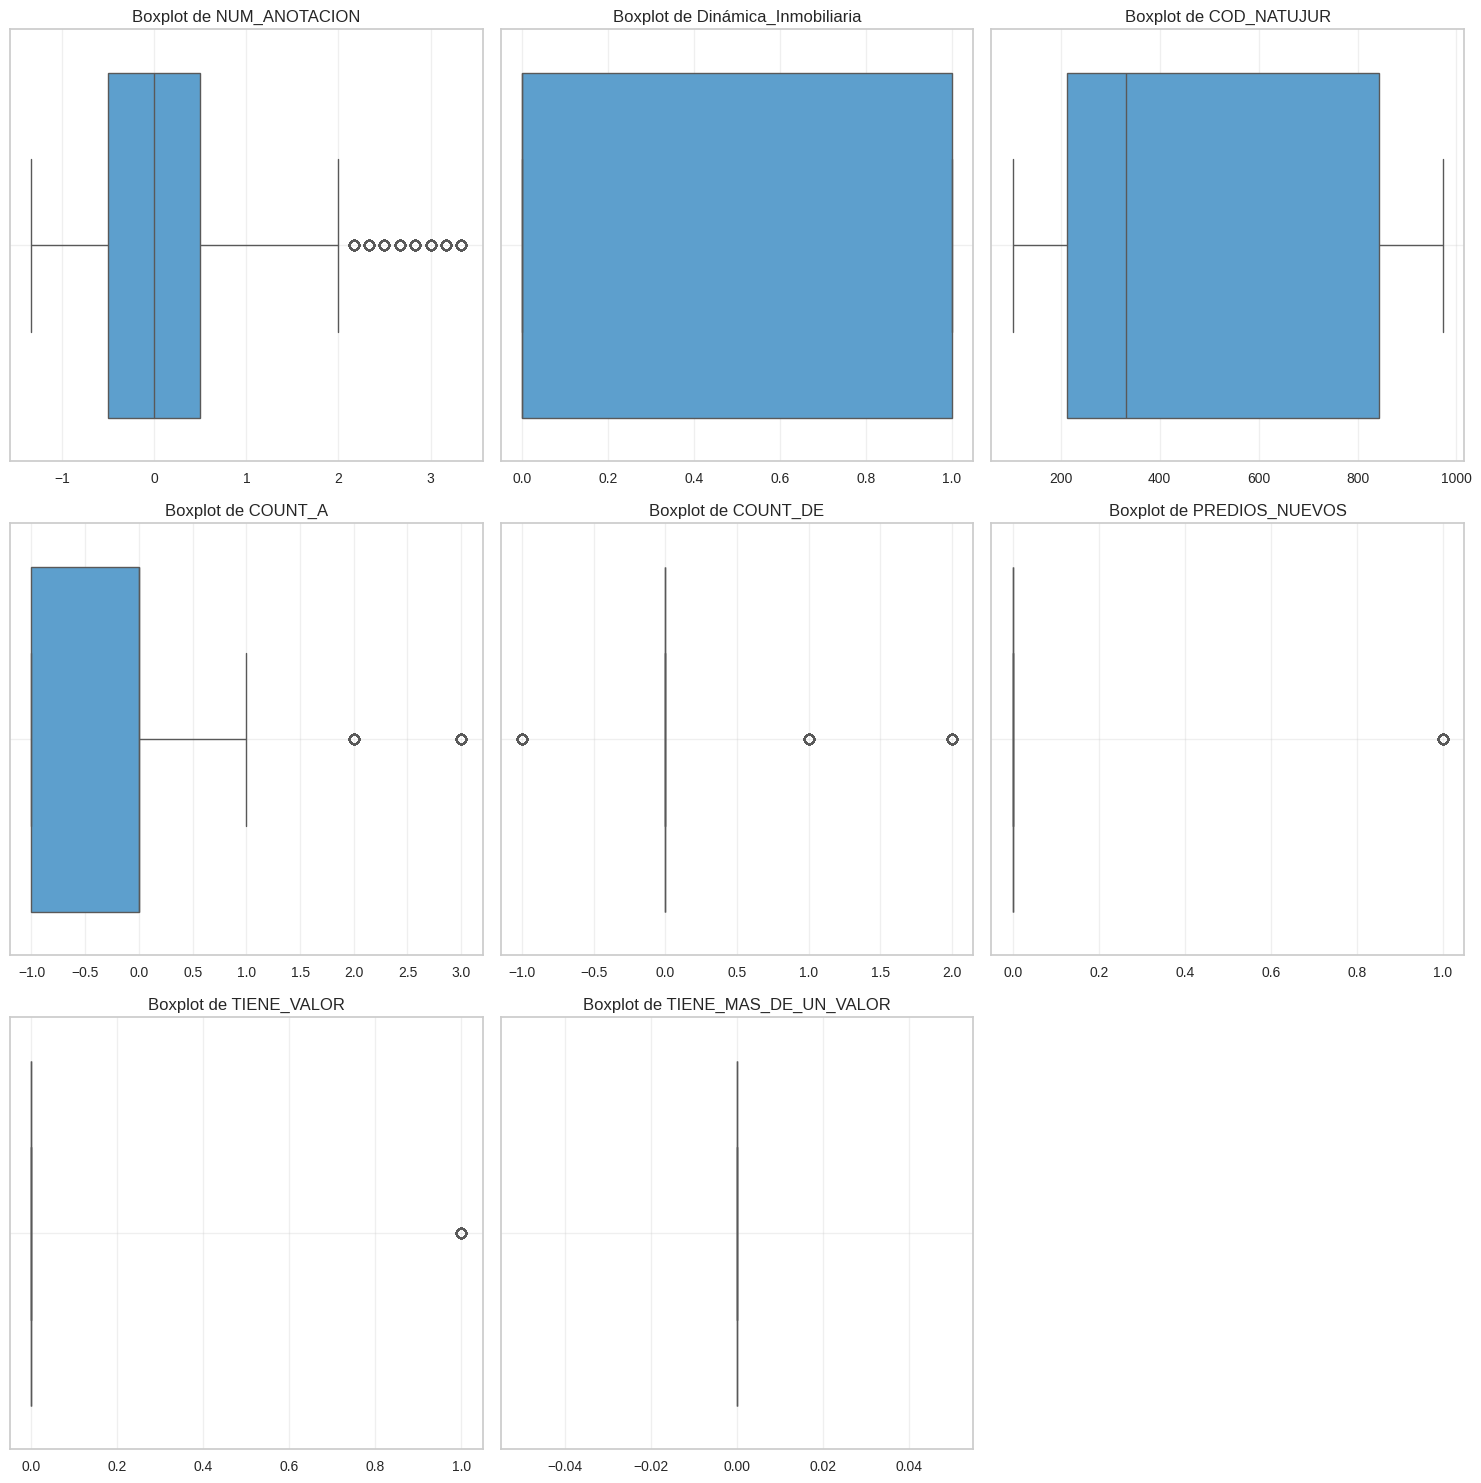

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = [
 "NUM_ANOTACION", "Dinámica_Inmobiliaria", "COD_NATUJUR",
    "COUNT_A", "COUNT_DE", "PREDIOS_NUEVOS",
    "TIENE_VALOR", "TIENE_MAS_DE_UN_VALOR"
]

n = len(columnas_numericas)
columnas = 3
filas = math.ceil(n / columnas)

plt.figure(figsize=(15, 5 * filas))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(filas, columnas, i)
    sns.boxplot(x=df_clean[col], color="#4AA3E0")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()